In [2]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import math
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
import bisect

cosmo = FlatLambdaCDM(H0=72, Om0=0.3)

In [3]:
hdulist = fits.open('../petroC_nsa_gzoo.fits')
tbdata = hdulist[1].data
color = tbdata['col10'] #^{0.1}(g-r), K-E corrected to z=0.1, petro
M_r = tbdata['col9'] #^{0.1}(M_r) - 5\log h, K-E corrected to z=0.1, petro
pfeatures = tbdata['t01_smooth_or_features_a02_features_or_disk_weighted_fraction']
psmooth = tbdata['t01_smooth_or_features_a01_smooth_weighted_fraction']
sSFR = tbdata['B300']
HA = tbdata['HAFLUX']
HB = tbdata['HBFLUX']
O3 = tbdata['O3FLUX']
N2 = tbdata['N2FLUX']
D4000 = tbdata['D4000']
z = tbdata['Z']
hdulist.close()

In [4]:
D4000_bins, SSFR_bins, Errs = np.load('../Dn4000Params_final.npy')

In [42]:
#n = 5
matches = []
for n in star_forming:
    FHA = HA[n]*(1e-17)*u.erg / u.s / u.cm**2
    #print('FHA',FHA)
    FHA = FHA.to(u.erg/ u.s / (u.pc**2))
    FHB = HB[n]*(1e-17)*u.erg / u.s / u.cm**2
    FHB = FHB.to(u.erg/ u.s / (u.pc**2))
    #FHB = FHB.to(u.W/u.pc**2)
    #print('FHA erg/s/pc^2',FHA)
    LHA = (cosmo.luminosity_distance(z[n]).to(u.pc))**2 * 4 * math.pi * FHA
    LHB = (cosmo.luminosity_distance(z[n]).to(u.pc))**2 * 4 * math.pi * FHB
    #print('LHA',LHA)
    LHA_c = LHA*(((LHA/LHB)/2.8)**2.36)
    #print('LHA_c', LHA_c)
    logsSFR = math.log(LHA_c.value, 10) - 41.1
    #print('Halpha SFR', logsSFR)
    sfr_ind = bisect.bisect_left(D4000_bins, D4000[3])-1
    logsSFRd4000 = SSFR_bins[sfr_ind]
    #print('d4000 sfr', logsSFRd4000)
    #print(z[10])
    #print(cosmo.luminosity_distance(z[2]))
    O3_BPT = math.log(O3[n]/HB[n],10)
    N2_BPT = math.log(N2[n]/HA[n],10)
    if O3_BPT > 0.61/(N2_BPT - 0.05) + 1.3 or N2_BPT > -0.2:
        print 'AGN'
    if abs(logsSFR - logsSFRd4000) < 1:
        print 'match', n
        matches.append(n)
    

match 3644
match 5676
match 5924
match 7331
match 45381


In [44]:

print HA[matches]
print HB[matches]
print O3[matches]
print N2[matches]

[ 5.64977932  5.4958148   3.83197498  6.07965326  3.6889174 ]
[ 1450.65185547   913.92938232   605.26135254  2881.01147461  1556.66760254]
[ 16.03750801   3.2645669    9.65582371  29.93283844   6.51869059]
[ 0.38459149  1.79212332  2.24611354  2.12220788  1.7939322 ]


In [24]:
print D4000_bins
print SSFR_bins

[ 0.80101561  1.10142304  1.13208852  1.15113298  1.16733786  1.18091313
  1.19219692  1.20179813  1.21068943  1.21913129  1.22687369  1.23454819
  1.24195733  1.24912133  1.25593801  1.26237632  1.26886449  1.27514715
  1.28155527  1.28780806  1.29426481  1.30067505  1.30707609  1.31369093
  1.32006098  1.32676239  1.33353109  1.34067535  1.34826622  1.35608404
  1.36409112  1.37197134  1.38036453  1.38901569  1.39789521  1.40659505
  1.41541414  1.42436548  1.43380799  1.44368967  1.45473541  1.46660835
  1.47994662  1.49563299  1.51307282  1.53585958  1.56647194  1.60944416
  1.69537125  1.82320052  1.93338969  2.13237341  2.38287756]
[ -9.47409198  -9.54094185  -9.63919078  -9.75140186  -9.83141777
  -9.87846141  -9.91179838  -9.94370236  -9.94683605  -9.98264031
 -10.00213344 -10.02899754 -10.05150454 -10.07132443 -10.07747607
 -10.08525496 -10.10702553 -10.12970658 -10.14563822 -10.1663001
 -10.17788962 -10.20175496 -10.20584201 -10.2322598  -10.24596204
 -10.25490387 -10.2673304

In [30]:
early_pfeatures = []
early_psmooth = []
early_color = []
early_sfr = []
early_mr = []

late_pfeatures = []
late_psmooth = []
late_color = []
late_sfr = []
late_mr = []

int_pfeatures = []
int_psmooth = []
int_color = []
int_sfr = []
int_mr = []

FHA_arr = []
FHB_arr = []
FN2_arr = []
FO3_arr = []

star_forming = []
for i in np.arange(pfeatures.size):
    if z[i] > 0.01 and z[i] < 0.06 and HA[i] > 0 and HB[i] > 0:
        color_line = 0.7 - 0.032*(M_r[i] + 16.5)
        active_line = -10 + 0.094*(M_r[i] + 15)
    
        #Get fluxes in the correct units, add to arrays
        FHA = HA[i]*(1e-17)*u.erg / u.s / u.cm**2
        FHA = FHA.to(u.erg/ u.s / (u.pc**2))
        #FHA = FHA.to(u.W/(u.pc**2))
        FHA_arr.append(FHA.value)
        LHA = (cosmo.luminosity_distance(z[i]).to(u.pc))**2 * 4 * math.pi * FHA
        
        FHB = HB[i]*(1e-17)*u.erg / u.s / u.cm**2
        FHB = FHB.to(u.erg/ u.s / (u.pc**2))
        #FHB = FHB.to(u.W/(u.pc**2))
        FHB_arr.append(FHB.value)
        LHB = (cosmo.luminosity_distance(z[i]).to(u.pc))**2 * 4 * math.pi * FHB
        
        FO3 = O3[i]*(1e-17)*u.erg / u.s / u.cm**2
        FO3 = FO3.to(u.erg/ u.s / (u.pc**2))
        #FO3 = FO3.to(u.W/(u.pc**2))
        FO3_arr.append(FO3.value)
        
        FN2 = N2[i]*(1e-17)*u.erg / u.s / u.cm**2
        FN2 = FN2.to(u.erg/ u.s / (u.pc**2))
        #FN2 = FN2.to(u.W/(u.pc**2))
        FN2_arr.append(FN2.value)
        
        if FHA > 0 and FHB > 0 and FO3 > 0 and FN2 > 0:
            O3_BPT = math.log(FO3/FHB,10)
            N2_BPT = math.log(FN2/FHA,10)
            if O3_BPT > 0.61/(N2_BPT - 0.05) + 1.3 or N2_BPT > -0.2: #galaxies that lie above Kauffman BPT line
                sfr_ind = bisect.bisect_left(D4000_bins, D4000[i])-1
                logsSFR = SSFR_bins[sfr_ind]
            else:
                star_forming.append(i)
                LHA_c = LHA*(((LHA/LHB)/2.8)**2.36) #corrected HA luminosity from Spindler et. al. 2017
                #FHA_c = FHA*(((FHA/FHB)/2.8)**2.36)
                logsSFR = math.log(LHA_c.value, 10) - 41.1 #SFR calculated using Halpha flux from Spindler et al 2017
            if color[i] >= color_line: #red galaxies
                if logsSFR <= active_line: #passive galaxies - early type
                    early_pfeatures.append(pfeatures[i])
                    early_psmooth.append(psmooth[i])
                    early_color.append(color[i])
                    early_sfr.append(logsSFR)
                    early_mr.append(M_r[i])
                else: #red and active - intermediate type
                    int_pfeatures.append(pfeatures[i])
                    int_psmooth.append(pfeatures[i])
                    int_color.append(color[i])
                    int_sfr.append(logsSFR)
                    int_mr.append(M_r[i])
            if logsSFR >= active_line and color[i] < color_line: #blue and active - late type
                late_pfeatures.append(pfeatures[i])
                late_psmooth.append(psmooth[i])
                late_color.append(color[i])
                late_sfr.append(logsSFR)
                late_mr.append(M_r[i])

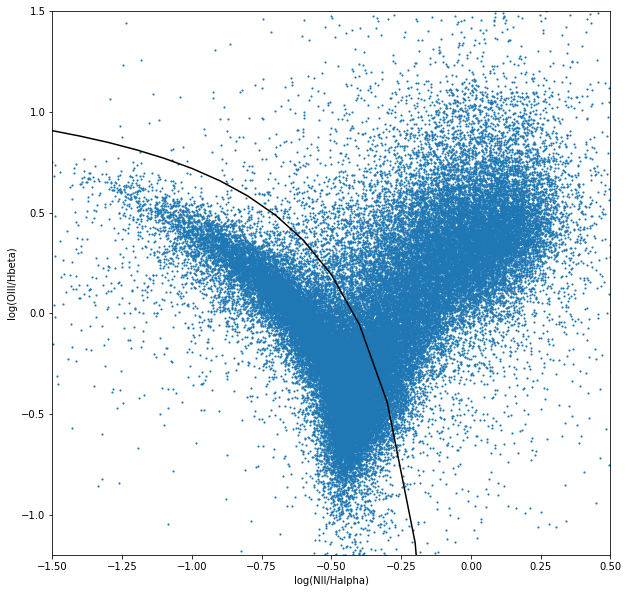

In [46]:
fig2 = plt.figure(figsize=(10,10))

O3HB = []
N2HA = []
for i in np.arange(len(FO3_arr)):
    if FO3_arr[i] > 0 and FHB_arr[i] > 0 and FN2_arr[i] > 0 and FHA_arr[i] > 0:
        O3HB.append(math.log(FO3_arr[i]/FHB_arr[i], 10))
        N2HA.append(math.log(FN2_arr[i]/FHA_arr[i], 10))

#create Kauffman line:
KN2 = np.arange(-1.5,0,0.1)
KO3 = 0.61/(KN2-0.05) + 1.3
plt.plot(KN2, KO3, color='k')
plt.scatter(N2HA, O3HB, marker = '.', s=5)
plt.xlim(-1.5,0.5)
plt.ylim(-1.2,1.5)
#plt.xlim(-3,1)
#plt.ylim(-3,2)
plt.xlabel('log(NII/Halpha)')
plt.ylabel('log(OIII/Hbeta)')
plt.show()
#plt.savefig('../BPT.jpg')

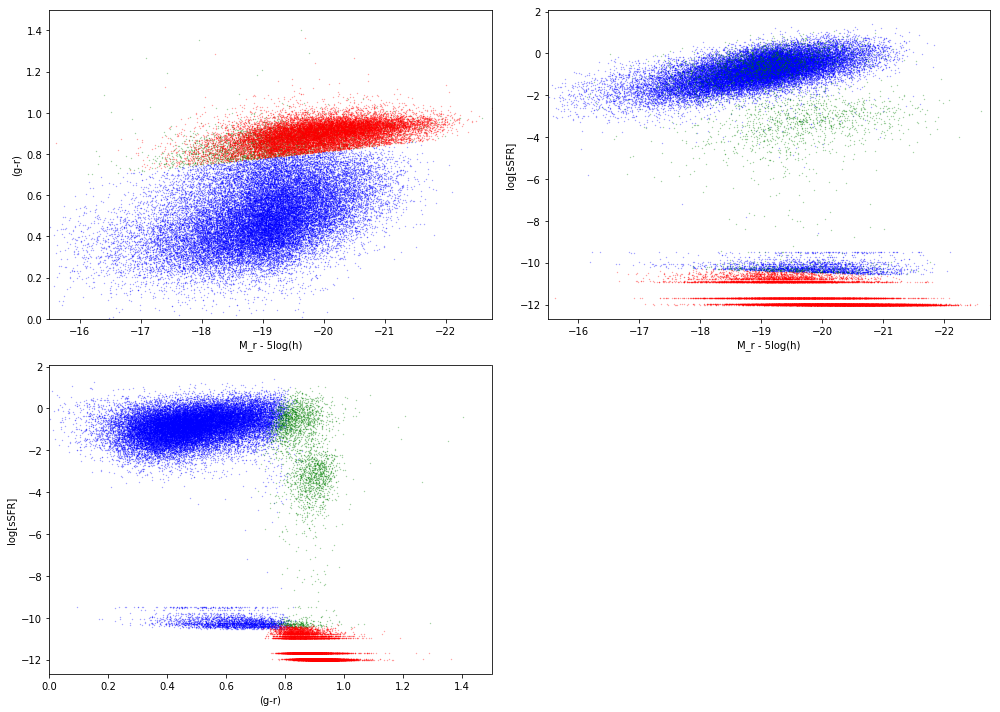

In [45]:
fig = plt.figure(figsize=(14,10))

colors = [late_color, int_color, early_color]
mrs = [late_mr, int_mr, early_mr]
sfrs = [late_sfr, int_sfr, early_sfr]
plot_color = ['b', 'g', 'r']

#top left plot
ax1 = fig.add_subplot(221)
for i in np.arange(3):
    ax1.scatter(mrs[i], colors[i], color = plot_color[i], s=0.1, alpha=0.5)
ax1.set_ylabel('(g-r)')
ax1.set_xlabel('M_r - 5log(h)')
ax1.set_ylim(0, 1.5)
ax1.set_xlim(-15.5, -22.75)

#top right plot
ax2 = fig.add_subplot(222)
for i in np.arange(3):
    ax2.scatter(mrs[i], sfrs[i], color = plot_color[i], s=0.1, alpha=0.5)
ax2.set_ylabel('log[sSFR]')
ax2.set_xlabel('M_r - 5log(h)')
#ax2.set_ylim(-12, -9)
ax2.set_xlim(-15.5, -22.75)

#bottom left plot
ax3 = fig.add_subplot(223)
for i in np.arange(3):
    ax3.scatter(colors[i], sfrs[i], color = plot_color[i], s=0.1, alpha=0.5)
ax3.set_ylabel('log[sSFR]')
ax3.set_xlabel('(g-r)')
#ax3.set_ylim(-12, -9)
ax3.set_xlim(0,1.5)

plt.tight_layout()
plt.show()

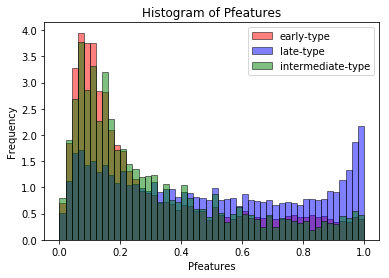

In [29]:
plt.hist(early_pfeatures, 50, normed=1, facecolor='r', alpha=0.5, ec='black', label='early-type')
plt.hist(late_pfeatures, 50, normed=1, facecolor='b', alpha=0.5, ec='black', label='late-type')
plt.hist(int_pfeatures, 50, normed=1, facecolor='g', alpha=0.5, ec='black', label='intermediate-type')
plt.xlabel('Pfeatures')
plt.ylabel('Frequency')
plt.title('Histogram of Pfeatures')
plt.legend(loc='upper right')
plt.show()

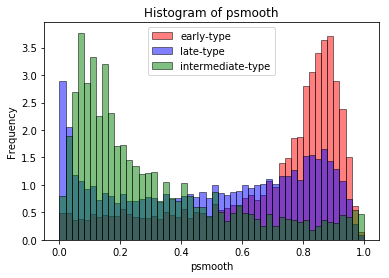

In [30]:
plt.hist(early_psmooth, 50, normed=1, facecolor='r', alpha=0.5, ec='black', label='early-type')
plt.hist(late_psmooth, 50, normed=1, facecolor='b', alpha=0.5, ec='black', label='late-type')
plt.hist(int_psmooth, 50, normed=1, facecolor='g', alpha=0.5, ec='black', label='intermediate-type')
plt.xlabel('psmooth')
plt.ylabel('Frequency')
plt.title('Histogram of psmooth')
plt.legend(loc='upper center')
plt.show()